## Figure 1: Private and Federal Student Debt

from "Student Debt Cancellation *Is* Progressive", a Roosevelt Institute research paper 

by Charlie Eaton, Adam Goldstein, Laura Hamilton, and Frederick Wherry

In [1]:
*ssc install dubois

In [2]:
graph set svg fontface Tahoma
graph set eps fontface Tahoma
graph set ps fontface Tahoma
set scheme dubois

In [3]:
use data/scfstudentdebt2019, clear

In [4]:
xtile incomedecile=income [pw=wgt], n(10)
label var incomedecile "Catherine/Yannelis income deciles"
label define incomedecile 1 "0-10%" 2 "10-20%" 3 "20-30%" 4 "30-40%" 5 "40-50%" ///
6 "50-60%" 7 "60-70%" 8 "70-80%" 9 "80-90%" 10 "90-100%"
label values incomedecile incomedecile

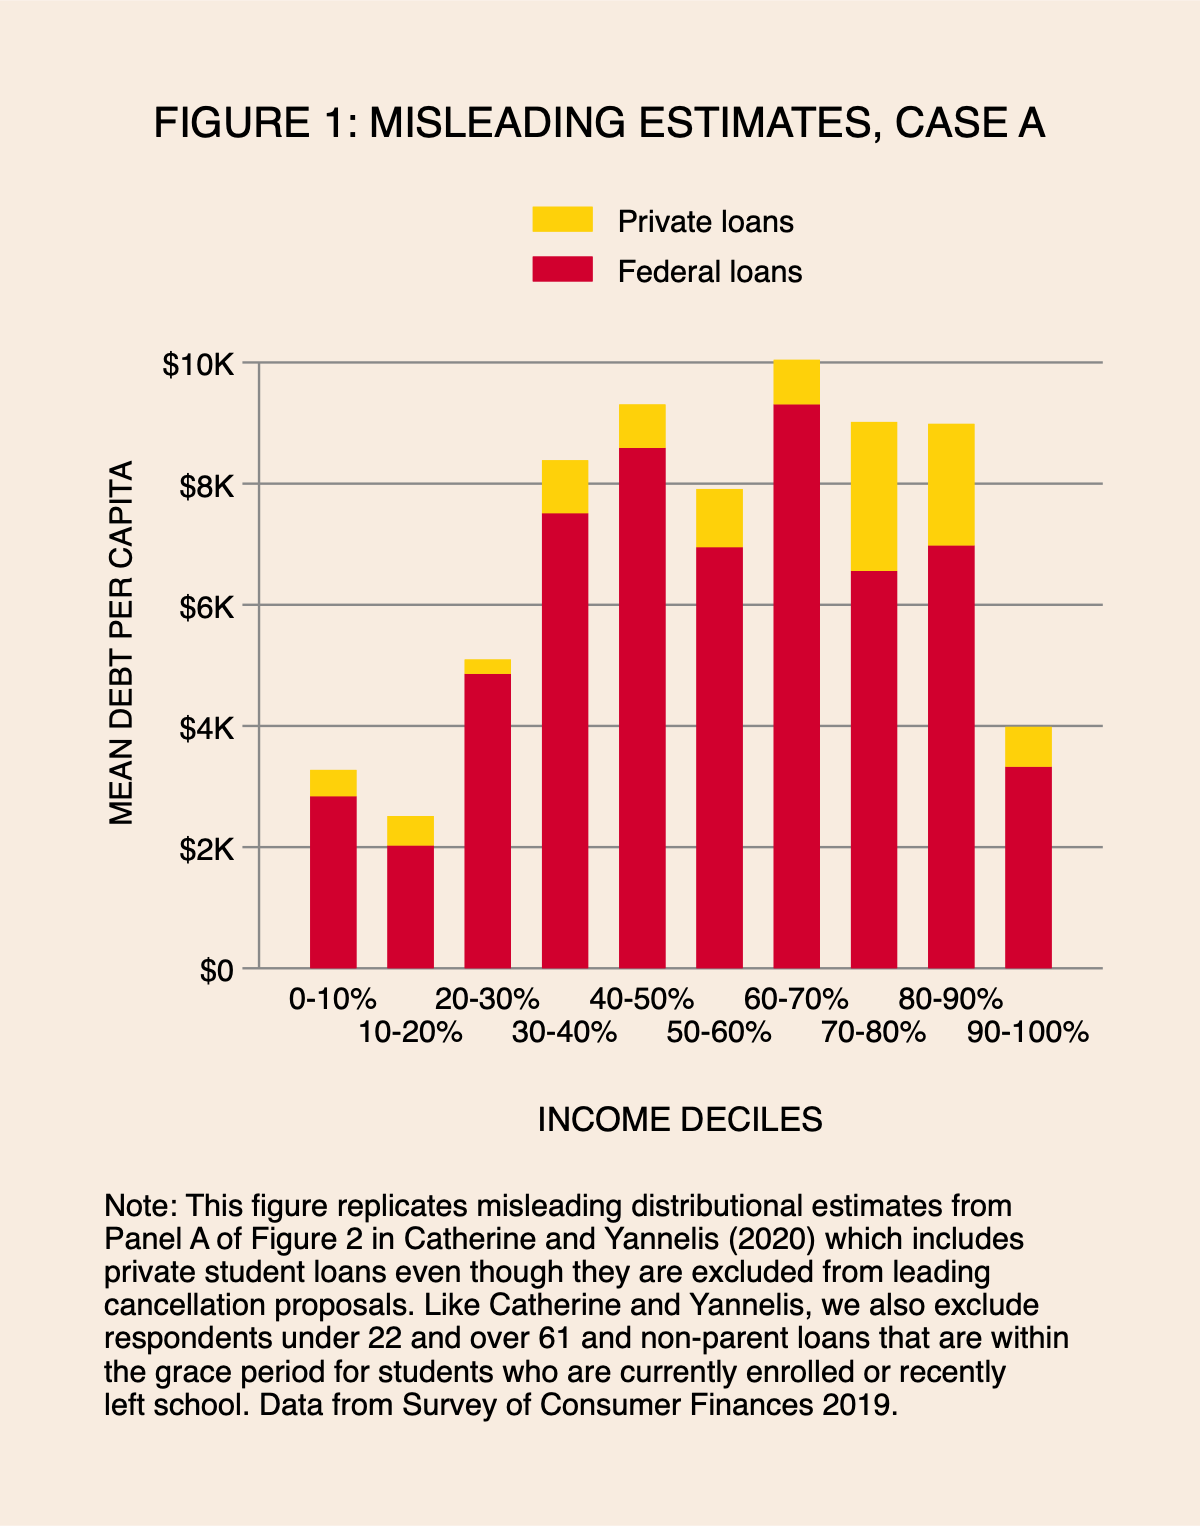

In [5]:
graph bar (mean) percapfedloan percapprivate  [pw=wgt] ///
    if age<61 & age>21, over(incomedecile, label(alternate)) ///
    stack b1title(" " "INCOME DECILES" " ", size(3)) ytitle(MEAN DEBT PER CAPITA) scheme(dubois) ///
    ylabel(0 "$0" 2000 "$2K" 4000 "$4K" 6000 "$6K" 8000 "$8K" 10000 "$10K") title("FIGURE 1: MISLEADING ESTIMATES, CASE A", size(3.5)  ///
    span) legend(pos(12) order(3 2 1) label(1 "Federal loans") ///
    label(2 "Private loans")) ///
    note("Note: This figure replicates misleading distributional estimates from" ///
        "Panel A of Figure 2 in Catherine and Yannelis (2020) which includes" ///
        "private student loans even though they are excluded from leading" ///
        "cancellation proposals. Like Catherine and Yannelis, we also exclude" ///
        "respondents under 22 and over 61 and non-parent loans that are within" ///
        "the grace period for students who are currently enrolled or recently" ///
        "left school. Data from Survey of Consumer Finances 2019.", size(small) xoffset(0)) graphregion(margin(large))

qui graph export figures/f1_fedprivatedebt.pdf, replace